In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# import squarify

A note to the layman / general public / hoi poloi / plebian scum:

30-40% of plots display extra data when you hover on or click them. Interactivity for the win!

This is an exploratory data analysis (EDA). I'm just poking it to see what's going on. The plots are not meant to be pretty (the pretty ones tend to have hover data). It views better on a computer instead of mobile. Ignore the random blocks of commented out code.

Expense, donation, and reimbursement data only exist for six years (2017 to 2023, minus 2020). Attendees data exists for 2014-2023.

2021 is an outlier (first year post-covid). 2017 is also an outlier, (no charge for music). We really only have four years of reliable data, a ridiculously small sample size, hampering the ability to do rigorous analysis.

Costco payments skew the data. I arbitrarily assigned 2/3rds to the Bar category and 1/3rd to Food, hoping it would be a rough estimate. Not sure it succeeds.

Feedback is appreciated, and may lead to me plotting new charts.

## Table of Contents

- [Data Wrangling](#data-wrangling)
- [Describe the df's](#describe-the-dfs)
- [Plots!](#plots!)
- [Total Expenses and Donations](#total-expenses-and-donations)
- [Categories](#categories)
- [Reimbursements](#reimbursements)
- [Attendees](#attendees)
- [Sub-categories](#sub-categories)
- [Broing Stats](#boring-stats)

## Data Wrangling

#### Load Data Frames

#### Most data wrangling already happened, during extraction from Google Sheets, with names changed in a git ignored piece of code

## <center>df = `harvest_party_expenses.csv`</center>

In [2]:
# read in main expenses csv as a df
df = pd.read_csv("./resources/harvest_party_expenses.csv")
df.head()

,Name,Expense,Expense Amt,Date bought,Category
0,Randy Detman,Key chains,150,2017,Merch
1,Morning Glory,Liquor / Food / Costco,50,2017,Costco
2,Randy Detman,Cleaning service,60,2017,Cleaning
3,Randy Detman,Carpet cleaner,50,2017,Cleaning
4,Morning Glory,Brau kegs,140,2017,Bar


In [3]:
# convert all 'Expense Amt' to float with regex (remove $ and ,)
df["Expense Amt"] = df["Expense Amt"].replace("[\$,]", "", regex=True).astype(float)

# confirm all of 'Expense Amt' are floats
df.dtypes

Name            object
Expense         object
Expense Amt    float64
Date bought      int64
Category        object
dtype: object

In [4]:
# rename columns
df = df.rename(columns={"Expense Amt": "Amount", "Date bought": "Year"})
df

,Name,Expense,Amount,Year,Category
0,Randy Detman,Key chains,150.0,2017,Merch
1,Morning Glory,Liquor / Food / Costco,50.0,2017,Costco
2,Randy Detman,Cleaning service,60.0,2017,Cleaning
3,Randy Detman,Carpet cleaner,50.0,2017,Cleaning
4,Morning Glory,Brau kegs,140.0,2017,Bar
...,...,...,...,...,...
92,Randy Detman,Logo,200.0,2023,Logo
93,Latvia,Sid's shirts,50.0,2023,Merch
94,Watsonville,Cleaner Uber,20.0,2023,Cleaning
95,Bitter Barbie,New t-shirts advance payment,150.0,2023,Merch


##### Break the Costco Category up. One-third to Food, Two-thirds to Bar.

In [5]:
# Re-categorize Costco, giving 1/3 to Food, 2/3 to Bar
# food
df_food = df[df.Category == "Costco"].copy()
df_food.Amount /= 3
df_food.Category = "Food"
# bar
df_bar = df[df.Category == "Costco"].copy()
df_bar.Amount *= 2 / 3
df_bar.Category = "Bar"

# remove Costco from original df
df = df[df.Category != "Costco"]

# combine all dfs
df = pd.concat([df, df_food, df_bar], ignore_index=True)
df

,Name,Expense,Amount,Year,Category
0,Randy Detman,Key chains,150.000000,2017,Merch
1,Randy Detman,Cleaning service,60.000000,2017,Cleaning
2,Randy Detman,Carpet cleaner,50.000000,2017,Cleaning
3,Morning Glory,Brau kegs,140.000000,2017,Bar
4,Tom Brady,Plates/cups etc,50.000000,2017,Food
...,...,...,...,...,...
99,Morning Glory,"Costco Liquor / Plates / Paper Towels, TP, tra...",133.333333,2019,Bar
100,Randy Detman,Costco part 2,34.240000,2019,Bar
101,Randy Detman,Costco,178.773333,2021,Bar
102,Randy Detman,Costco,282.013333,2022,Bar


## <center>reim_df = `reimbursements.csv`</center>

In [6]:
# read in pay_outs csv as a df
reim_df = pd.read_csv("./resources/reimbursements.csv")
reim_df.head()

,Year,Name,Paid
0,2017,Randy Detman,647
1,2017,Watsonville,40
2,2017,Morning Glory,190
3,2017,Tom Brady,337
4,2018,Randy Detman,950


In [7]:
# convert all 'Paid' to float with regex (remove $ and ,)
reim_df.Paid = reim_df.Paid.replace("[\$,]", "", regex=True).astype(float)

# confirm all of 'Paid' are floats
reim_df.dtypes

Year      int64
Name     object
Paid    float64
dtype: object

In [8]:
reim_df

,Year,Name,Paid
0,2017,Randy Detman,647.00
1,2017,Watsonville,40.00
2,2017,Morning Glory,190.00
3,2017,Tom Brady,337.00
4,2018,Randy Detman,950.00
5,2018,Morning Glory,367.00
6,2018,Tom Brady,567.00
7,2019,Randy Detman,938.98
8,2019,Morning Glory,725.00
9,2019,Tom Brady,700.00


## <center>don_df = `donations.csv`</center>

In [9]:
don_df = pd.read_csv("./resources/donations.csv")
don_df

,year,donations
0,2023,"$5,095.00"
1,2022,"$5,485.00"
2,2021,"$1,981.00"
3,2019,"$3,242.40"
4,2018,"$1,884.00"
5,2017,"$1,214.00"
6,2016,NaN
7,2015,NaN
8,2014,NaN


In [10]:
# convert all 'donations' to float with regex (remove $ and ,)
don_df.donations = don_df.donations.replace("[\$,]", "", regex=True).astype(float)

# confirm all of 'donations' are floats
don_df.dtypes

year           int64
donations    float64
dtype: object

In [11]:
don_df = don_df.rename(columns={"year": "Year", "donations": "Donations"})
don_df.dropna(inplace=True)
don_df

,Year,Donations
0,2023,5095.0
1,2022,5485.0
2,2021,1981.0
3,2019,3242.4
4,2018,1884.0
5,2017,1214.0


## <center>att_df = `attendees.csv`</center>

In [12]:
att_df = pd.read_csv("./resources/attendees.csv")
att_df

,year,facebook_going,facebook_maybes
0,2023,97,29
1,2022,100,40
2,2021,95,25
3,2019,194,85
4,2018,136,54
5,2017,156,76
6,2016,59,29
7,2015,127,49
8,2014,40,11


In [13]:
att_df.dtypes

year               int64
facebook_going     int64
facebook_maybes    int64
dtype: object

In [14]:
att_df = att_df.rename(
    columns={"year": "Year", "facebook_going": "Going", "facebook_maybes": "Maybes"}
)
att_df

,Year,Going,Maybes
0,2023,97,29
1,2022,100,40
2,2021,95,25
3,2019,194,85
4,2018,136,54
5,2017,156,76
6,2016,59,29
7,2015,127,49
8,2014,40,11


#### Data wrangling complete

#### ------------

## Describe the dfs

- [Back to Table of Contents](#table-of-contents)

Basic stats. Count of rows / entries. Mean (average), max and min, standard deviation, quartiles. Ignore the Year column.

In [15]:
df.describe()  # expenses

,Amount,Year
count,104.000000,104.000000
mean,179.052308,2020.250000
std,201.174648,2.171081
min,0.000000,2017.000000
25%,60.000000,2018.750000
50%,105.761667,2021.000000
75%,200.000000,2022.000000
max,950.000000,2023.000000


In [16]:
reim_df.describe()  # reimbursements

,Year,Paid
count,30.000000,30.000000
mean,2020.200000,586.502000
std,2.203446,488.626515
min,2017.000000,20.000000
25%,2019.000000,180.055000
50%,2019.000000,560.000000
75%,2022.000000,947.245000
max,2023.000000,2002.940000


In [17]:
don_df.describe()  # donations

,Year,Donations
count,6.000000,6.000000
mean,2020.000000,3150.233333
std,2.366432,1786.684104
min,2017.000000,1214.000000
25%,2018.250000,1908.250000
50%,2020.000000,2611.700000
75%,2021.750000,4631.850000
max,2023.000000,5485.000000


In [18]:
att_df.describe()  # attendees

,Year,Going,Maybes
count,9.000000,9.000000,9.000000
mean,2018.333333,111.555556,44.222222
std,3.162278,47.579174,24.355583
min,2014.000000,40.000000,11.000000
25%,2016.000000,95.000000,29.000000
50%,2018.000000,100.000000,40.000000
75%,2021.000000,136.000000,54.000000
max,2023.000000,194.000000,85.000000


## Plots!

## Total Expenses and Donations

- [Back to Table of Contents](#table-of-contents)

In [19]:
print("INTRODUCTORY SUMMARY STATS!")
print("-------------------------------------")
print(f"Total Spent over all years: ${df.Amount.sum():.2f}")
print(f"Total Donated over all years: ${don_df.Donations.sum():.2f}")
print(f"Total Reimbursed over all years: ${reim_df.Paid.sum():.2f}\n")
print(
    f"Total hypothetical profit over all years: ${don_df.Donations.sum() - df.Amount.sum():.2f}"
)
print(
    f"Total actual profit over all years: ${don_df.Donations.sum() - reim_df.Paid.sum():.2f}"
)
print(
    f"N.B.: We donated 2022, $716.80. We did not donate 2023 ($411.26) or 2019 ($179.05)"
)
print(
    "We were surprised when we turned a profit in 2019. I think we threw a pizza party.\n"
)

# group by year, calculate total expenses and donations per year
df_yearly = df.groupby("Year")["Amount"].sum()
don_yearly = don_df.groupby("Year")["Donations"].sum()

# calculate profit per year
profit_yearly = don_yearly - df_yearly

# sum years with positive and negative profit
positive_profit_sum = profit_yearly[profit_yearly > 0].round(2).sum()
negative_profit_sum = profit_yearly[profit_yearly < 0].sum()

# Print the results
print(f"Sum of years with positive profit: ${positive_profit_sum:.2f}")
print(f"Sum of years with negative profit: ${negative_profit_sum:.2f}\n")
print("Numbers slightly off due to rounding errors (floating point imprecision)")

INTRODUCTORY SUMMARY STATS!
-------------------------------------
Total Spent over all years: $18621.44
Total Donated over all years: $18901.40
Total Reimbursed over all years: $17595.06

Total hypothetical profit over all years: $279.96
Total actual profit over all years: $1306.34
N.B.: We donated 2022, $716.80. We did not donate 2023 ($411.26) or 2019 ($179.05)
We were surprised when we turned a profit in 2019. I think we threw a pizza party.

Sum of years with positive profit: $1307.11
Sum of years with negative profit: $-1027.15

Numbers slightly off due to rounding errors (floating point imprecision)


Wow. $18,621.44 over six years. Not bad for a neighborhood alley block party.

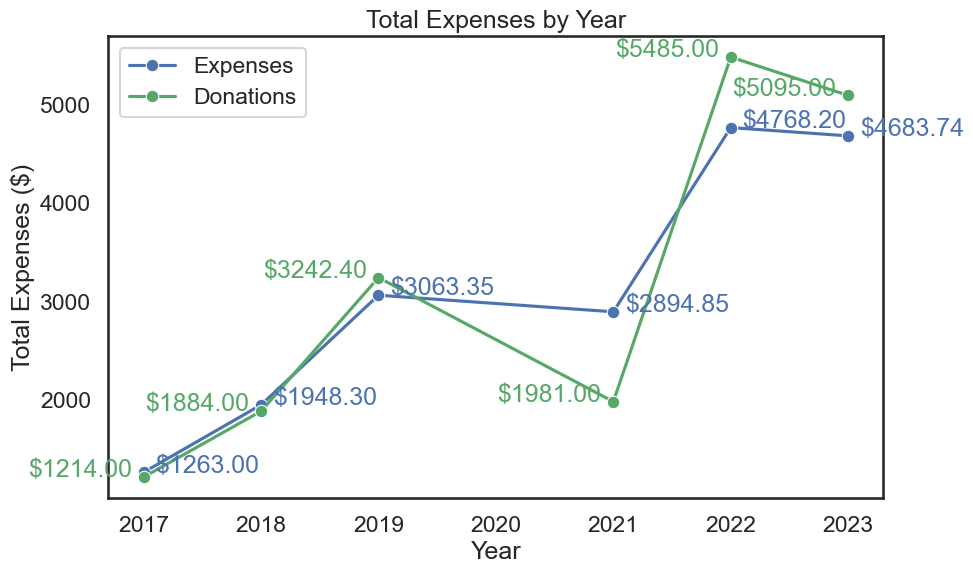

In [20]:
# plot expenses and donations by year as a line chart
sns.set_theme(style="white", context="talk")
plt.figure(figsize=(10, 6))
sns.lineplot(
    x="Year", y="Amount", data=df, estimator="sum", errorbar=None, marker="o", color="b"
)
sns.lineplot(x="Year", y="Donations", data=don_df, errorbar=None, marker="o", color="g")

# annotate each data point
df_sum = df.groupby("Year")["Amount"].sum()
for year, amount in df_sum.items():
    plt.text(
        year + 0.1, amount, f"${amount:.2f}", horizontalalignment="left", color="b"
    )
for _, row in don_df.iterrows():
    year = row.Year
    amount = row.Donations
    plt.text(
        year - 0.1, amount, f"${amount:.2f}", horizontalalignment="right", color="g"
    )

# format plot
plt.title("Total Expenses by Year")
plt.xlabel("Year")
plt.ylabel("Total Expenses ($)")
plt.legend(["Expenses", "Donations"])
plt.show()

No surprises here. 2021 was bad, all other years were marginal misses or actually turned a profit. 2017 is definitely off, as there is no charge for music, so we probably lost quite a bit of money that year. I'm suspicious about 2018 as well. Tom Brady is generous (and giggling to themselves at all of the kudos I shall be giving to "Tom Brady" who, to be clear, is not the famous ball-deflating footballer, but a pseudonym for a dear friend and hapless Patriots fan).

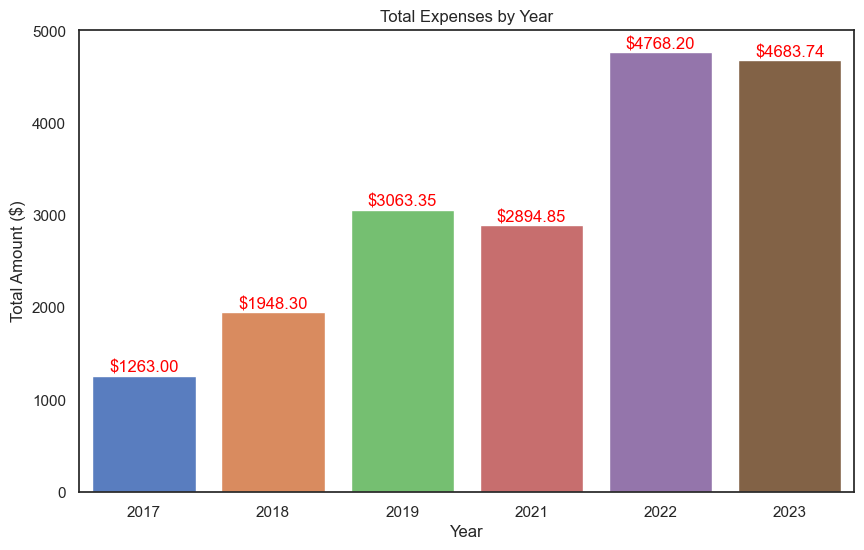

In [21]:
# bar plot of each year's expenses

# group and sort sums by year
df_sum = df.groupby("Year")["Amount"].sum().reset_index()
df_sum = df_sum.sort_values("Amount", ascending=False)

# plot the chart
sns.set_theme(style="white")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Year", y="Amount", data=df_sum, palette="muted")

# add labels
for container in ax.containers:
    ax.bar_label(container, fmt="$%.2f", color="red")

# format plot
plt.title("Total Expenses by Year")
plt.xlabel("Year")
plt.ylabel("Total Amount ($)")
plt.show()

Before: 
   Year  Expenses  Donations
0  2017   1263.00     1214.0
1  2018   1948.30     1884.0
2  2019   3063.35     3242.4
3  2021   2894.85     1981.0
4  2022   4768.20     5485.0
5  2023   4683.74     5095.0

After: 
    Year       Type   Amount
0   2017   Expenses  1263.00
1   2018   Expenses  1948.30
2   2019   Expenses  3063.35
3   2021   Expenses  2894.85
4   2022   Expenses  4768.20
5   2023   Expenses  4683.74
6   2017  Donations  1214.00
7   2018  Donations  1884.00
8   2019  Donations  3242.40
9   2021  Donations  1981.00
10  2022  Donations  5485.00
11  2023  Donations  5095.00


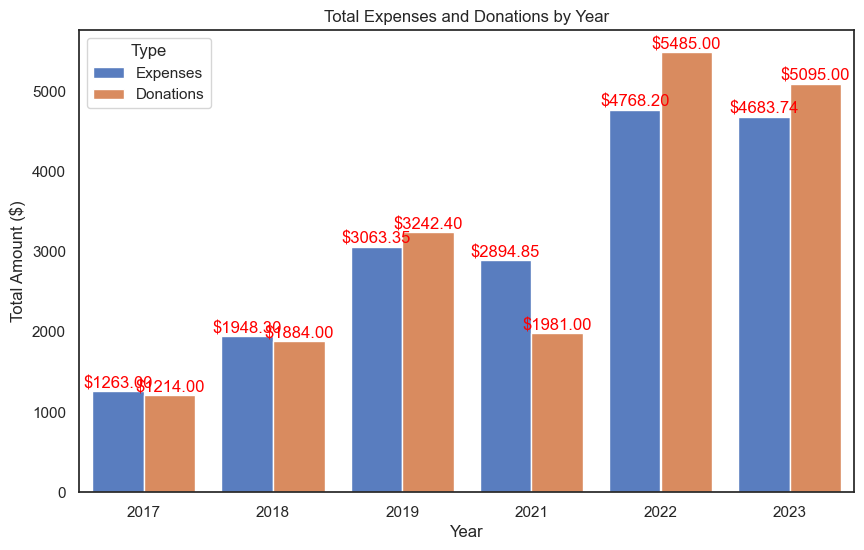

In [22]:
# grouped barchart of expenses and donations by year
df_sum = df.groupby("Year")["Amount"].sum().reset_index()
df_sum.columns = ["Year", "Expenses"]

don_sum = don_df.copy()

# merge expenses and donations dfs
df_sum = pd.merge(df_sum, don_sum, on="Year", how="outer")

# 'unpivot' the df (see print() output for before and after)
print(f"Before: \n{df_sum}\n")
df_sum_melt = df_sum.melt("Year", var_name="Type", value_name="Amount")
print(f"After: \n{df_sum_melt}")

# plot grouped barchart
sns.set_theme(style="white")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Year", y="Amount", hue="Type", data=df_sum_melt, palette="muted")

# add labels
for container in ax.containers:
    ax.bar_label(container, fmt="$%.2f", color="red")

# format plot
plt.title("Total Expenses and Donations by Year")
plt.xlabel("Year")
plt.ylabel("Total Amount ($)")
plt.legend(title="Type")
plt.show()

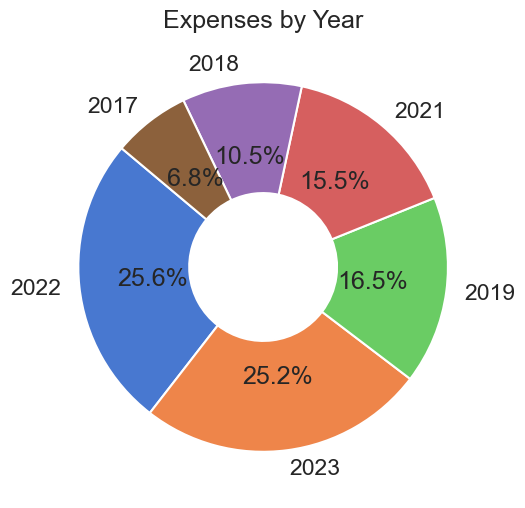

In [23]:
# plot total expenses by year as a donut chart

# group and sort sums by year
df_sum = df.groupby("Year")["Amount"].sum().reset_index()
df_sum = df_sum.sort_values("Amount", ascending=False)

# plot and format donut chart
sns.set_theme(style="white", context="talk")
plt.figure(figsize=(10, 6))
plt.pie(
    df_sum.Amount,
    labels=df_sum.Year,
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("muted"),
    wedgeprops=dict(width=0.6, edgecolor="w"),
)
plt.title("Expenses by Year")
plt.show()

2022 and 2023 took up more than half of all expenses for the six years we have data. Costs have escalated. This is a central, albeit unsurprising, insight.

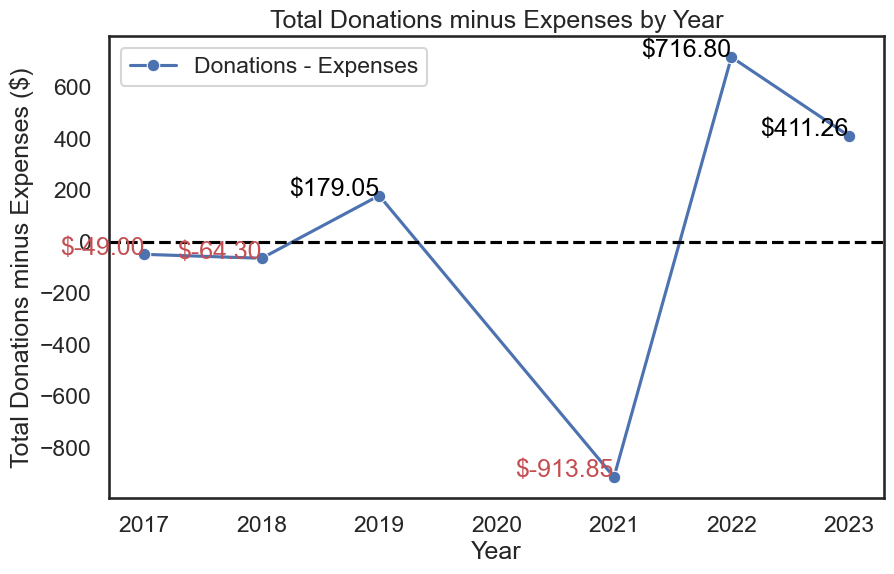

In [24]:
# plot donations minus expenses by year as a line chart

# group and sum expenses by year
df_sum = df.groupby("Year")["Amount"].sum().reset_index()
df_sum.columns = ["Year", "Amount"]

don_sum = don_df.copy()  # donations df

# merge expenses and donations dfs
df_sum = pd.merge(df_sum, don_sum, on="Year", how="outer")

# calculate expenses minus donations
df_sum["Donations_minus_expenses"] = df_sum["Donations"] - df_sum["Amount"]

# plot and format line chart
sns.set_theme(style="white", context="talk")
plt.figure(figsize=(10, 6))

sns.lineplot(
    x="Year",
    y="Donations_minus_expenses",
    data=df_sum,
    marker="o",
    # color="r",
    label="Donations - Expenses",
)

# Add a horizontal line at y=0
plt.axhline(0, color="black", linestyle="--")

# annotate each data point
for _, row in df_sum.iterrows():
    year = row.Year
    amount = row.Donations_minus_expenses
    color = "r" if amount < 0 else "black"
    plt.text(year, amount, f"${amount:.2f}", horizontalalignment="right", color=color)

# format plot
plt.title("Total Donations minus Expenses by Year")
plt.xlabel("Year")
plt.ylabel("Total Donations minus Expenses ($)")
plt.show()

## Categories

- [Back to Table of Contents](#table-of-contents)

<Figure size 1000x600 with 0 Axes>

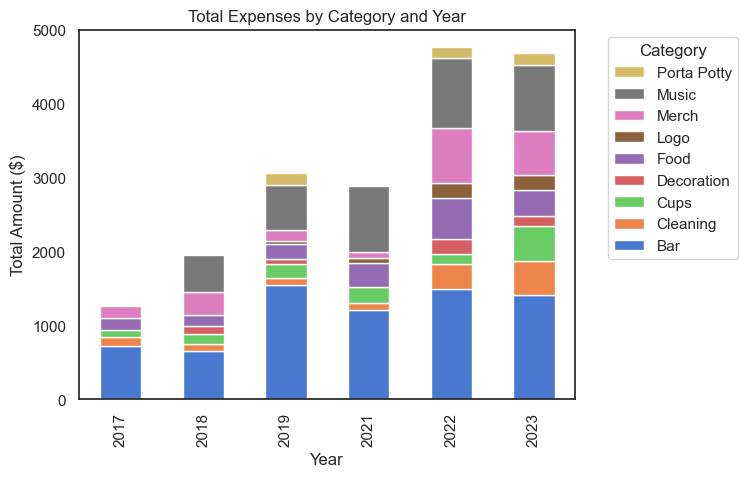

In [25]:
# plot a grouped bar chart of expenses by category, per year
df_cat = df.groupby(["Year", "Category"])["Amount"].sum().reset_index()
df_cat = df_cat.pivot(index="Year", columns="Category", values="Amount").reset_index()
df_cat = df_cat.fillna(0)

# plot the chart
sns.set_theme(style="white")
plt.figure(figsize=(10, 6))
ax = df_cat.plot(x="Year", kind="bar", stacked=True, color=sns.color_palette("muted"))

# format plot
plt.title("Total Expenses by Category and Year")
plt.xlabel("Year")
plt.ylabel("Total Amount ($)")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left", reverse=True)
plt.show()

#### No Music in 2017...? Tom Brady!!!!!! 😠 **shakes fist at sky**

<Figure size 1000x600 with 0 Axes>

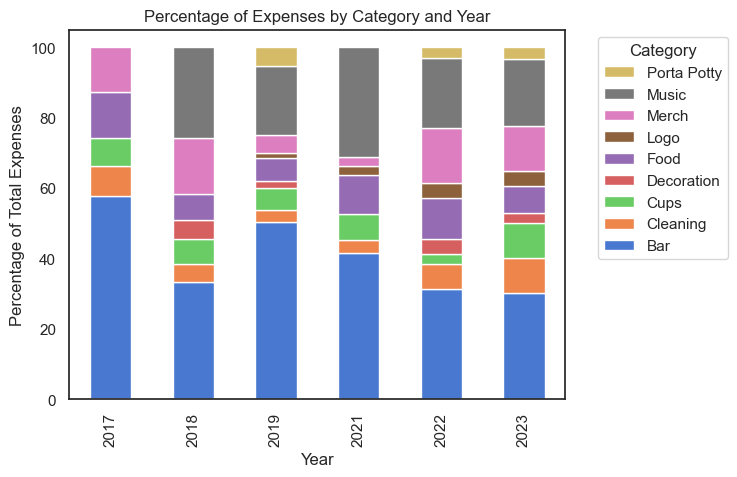

In [26]:
# plot of percentage of expenses by category per year

# group and sort sums by Category and Year
df_cat_year_sum = df.groupby(["Category", "Year"]).sum().reset_index()

# calculate total expenses per year
total_expenses_per_year = df.groupby("Year")["Amount"].sum().reset_index()

# merge total expenses into df_cat_year_sum
df_cat_year_sum = pd.merge(
    df_cat_year_sum, total_expenses_per_year, on="Year", suffixes=("", "_total")
)

# calculate percentage for each category-year combination
df_cat_year_sum["Percentage"] = (
    df_cat_year_sum["Amount"] / df_cat_year_sum["Amount_total"]
) * 100

# pivot df so each Category is a column for plotting
df_pivot = df_cat_year_sum.pivot(
    index="Year", columns="Category", values="Percentage"
).reset_index()
df_pivot = df_pivot.fillna(0)

# plot the chart
sns.set_theme(style="white")
plt.figure(figsize=(10, 6))
ax = df_pivot.plot(x="Year", kind="bar", stacked=True, color=sns.color_palette("muted"))

# format plot
plt.title("Percentage of Expenses by Category and Year")
plt.xlabel("Year")
plt.ylabel("Percentage of Total Expenses")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left", reverse=True)
plt.show()

In [27]:
# group and sort sums by Category and Year
df_cat_year_sum = df.groupby(["Category", "Year"]).sum().reset_index()

# calculate total expenses per year
total_expenses_per_year = df.groupby("Year")["Amount"].sum().reset_index()

# merge total expenses into df_cat_year_sum
df_cat_year_sum = pd.merge(
    df_cat_year_sum, total_expenses_per_year, on="Year", suffixes=("", "_total")
)

# calculate percentage for each category-year combination
df_cat_year_sum["Percentage"] = (
    df_cat_year_sum["Amount"] / df_cat_year_sum["Amount_total"]
) * 100

# plot the chart
fig = px.bar(
    df_cat_year_sum,
    x="Year",
    y="Percentage",
    color="Category",
    labels={"Percentage": "Percentage of Total Expenses", "Year": "Year"},
    title="Percentage of Expenses by Category and Year",
    hover_data=["Category", "Percentage"],
    category_orders={"Category": sorted(df["Category"].unique())},
    custom_data=["Category"],
)

# set the legend order
fig.update_layout(legend=dict(title="Category", traceorder="reversed"))

# format percentage and display the category in the hover
fig.update_traces(hovertemplate="Category: %{customdata[0]}<br>Percentage: %{y:.2f}%")

fig.show()

2017 and 2021 are outliers. Why was 2019 so different from 2018, 2022, and 2023? My guess is, it was the best attended of them all, so we had to purchase extra alcohol the day of the party (at usurious rates).

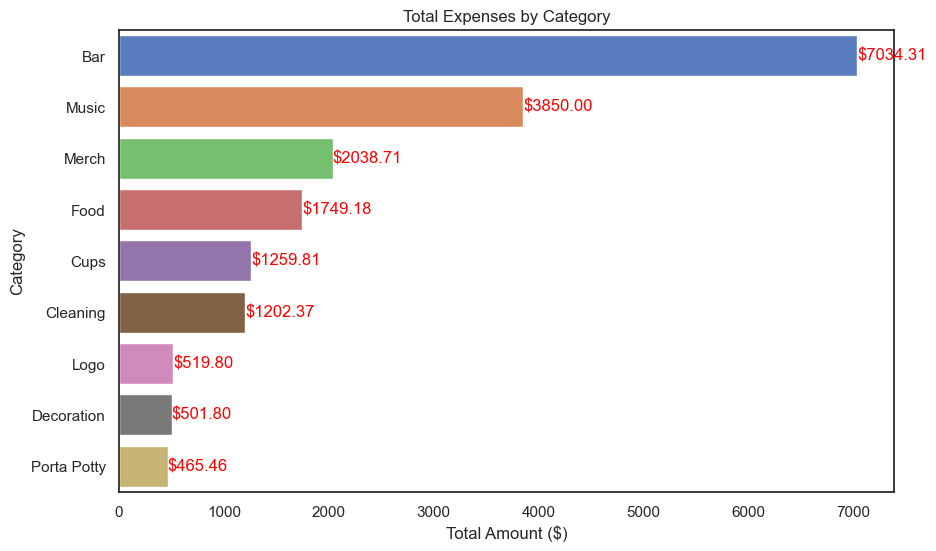

In [28]:
# plot a bar chart of total expenses by category

# group and sort Amount by Category
df_cat_sum = df.groupby("Category")["Amount"].sum().reset_index()
df_cat_sum = df_cat_sum.sort_values("Amount", ascending=False)

# plot the chart
sns.set_theme(style="white")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Amount", y="Category", data=df_cat_sum, palette="muted")

# add labels
for container in ax.containers:
    ax.bar_label(container, fmt="$%.2f", color="red")

# format plot
plt.title("Total Expenses by Category")
plt.xlabel("Total Amount ($)")
plt.ylabel("Category")
plt.show()

Bar and Music are our greatest contributors to cost. Also, kinda fixed costs. We should investigate ways to cheapen these expenses, but I suspect we can only shave off a little bit.

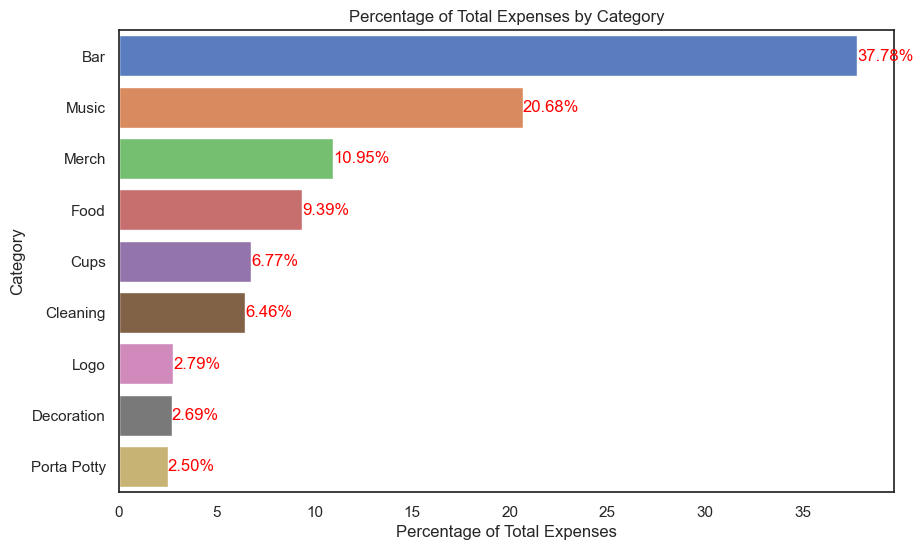

In [29]:
# bar chart of total expenses by category as a percentage of total expenses

# group and sort Amount by Category
df_cat_sum = df.groupby("Category")["Amount"].sum().reset_index()
df_cat_sum = df_cat_sum.sort_values("Amount", ascending=False)

# calculate percentage of total expenses for each category
df_cat_sum["Percentage"] = (df_cat_sum["Amount"] / df_cat_sum["Amount"].sum()) * 100

# plot the chart
sns.set_theme(style="white")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Percentage", y="Category", data=df_cat_sum, palette="muted")


# label foramtter
def format_label(value):
    return f"{value:.2f}%"


# add labels
for container in ax.containers:
    ax.bar_label(container, fmt=format_label, color="red")

# format plot
plt.title("Percentage of Total Expenses by Category")
plt.xlabel("Percentage of Total Expenses")
plt.ylabel("Category")
plt.show()

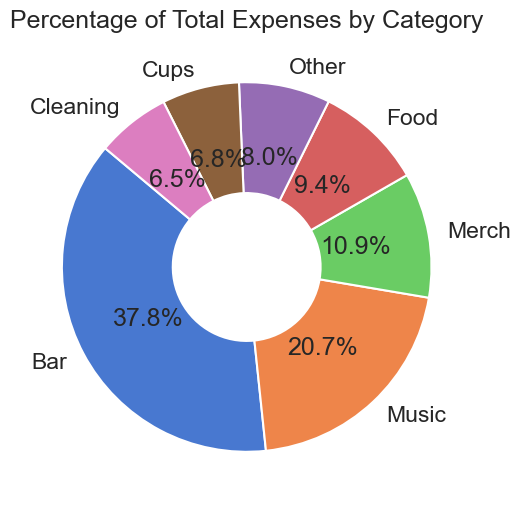

In [30]:
# pie chart of total expenses by category as a percentage of total expenses

# group and sort Amount by Category
df_cat_sum = df.groupby("Category")["Amount"].sum().reset_index()
df_cat_sum = df_cat_sum.sort_values("Amount", ascending=False)

# calculate percentage of total expenses for each category
df_cat_sum["Percentage"] = (df_cat_sum["Amount"] / df_cat_sum["Amount"].sum()) * 100

# replace names of those with less than 5% of the total with 'Other'
df_cat_sum.loc[df_cat_sum.Percentage < 5, "Category"] = "Other"

# group by name again to combine all 'Other' rows
df_cat_sum = df_cat_sum.groupby("Category").sum().reset_index()

# sort df
df_cat_sum = df_cat_sum.sort_values("Percentage", ascending=False)

# plot and format pie chart
sns.set_theme(style="white", context="talk")
plt.figure(figsize=(10, 6))
plt.pie(
    df_cat_sum.Percentage,
    labels=df_cat_sum.Category,
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("muted"),
    wedgeprops=dict(width=0.6, edgecolor="w"),
)
plt.title("Percentage of Total Expenses by Category")
plt.show()

In [31]:
# # treemap of total expenses by category

# # group and sort sums by category
# df_cat_sum = df.groupby("Category")["Amount"].sum().reset_index()
# df_cat_sum = df_cat_sum.sort_values("Amount", ascending=False)

# # plot chart
# fig = px.treemap(df_cat_sum, path=['Category'], values='Amount',
#                  title='Total Expenses by Category')

# # update layout for better display
# fig.update_layout(
#     height=600,
#     width=800,
#     uniformtext=dict(minsize=12, mode='hide'),
# )

# fig.show()

In [32]:
# # alternate treemap with percentages

# # group and sort sums by category
# df_cat_sum = df.groupby("Category")["Amount"].sum().reset_index()
# df_cat_sum = df_cat_sum.sort_values("Amount", ascending=False)

# # calculate percentage
# total = df_cat_sum["Amount"].sum()
# df_cat_sum["Percentage"] = df_cat_sum["Amount"].apply(lambda x: x / total * 100)

# # labels with percentage
# df_cat_sum["Label"] = df_cat_sum["Category"] + " (" + df_cat_sum["Percentage"].round(2).astype(str) + "%)"

# # plot chart
# fig = px.treemap(df_cat_sum, path=['Label'], values='Amount',
#                  title='Total Expenses by Category')

# # update layout for better display
# fig.update_layout(
#     height=600,
#     width=800,
#     uniformtext=dict(minsize=12, mode='hide'),
# )

# fig.show()

In [33]:
# # alternate treemap using squarify

# # group and sort sums by category
# df_cat_sum = df.groupby("Category")["Amount"].sum().reset_index()
# df_cat_sum = df_cat_sum.sort_values("Amount", ascending=False)

# # calculate relative sizes of rectangles
# sizes = df_cat_sum["Amount"] / df_cat_sum["Amount"].sum()

# # plot chart
# sns.set_theme(style="white")
# plt.figure(figsize=(10, 6))
# squarify.plot(sizes=sizes, label=df_cat_sum["Category"], alpha=0.6)

# # format plot
# plt.title("Total Expenses by Category")
# plt.axis('off')  # Turn off the axis
# plt.show()

In [34]:
# treemap of expenses by category and year

# group and sort sums by Category and Year
df_cat_year_sum = df.groupby(["Category", "Year"]).sum().reset_index()

# calculate percentage of total expenses for each category-year combination
df_cat_year_sum["Percentage"] = df_cat_year_sum.groupby("Year")["Amount"].transform(
    lambda x: x / x.sum() * 100
)

# plot the chart
fig = px.treemap(
    df_cat_year_sum,
    path=["Year", "Category"],
    values="Percentage",
    color="Year",
    color_continuous_scale="Viridis",
    title="Treemap Chart of Expenses by Category and Year",
    custom_data=["Percentage"],
)

# update layout for better display
fig.update_layout(
    height=600,
    width=800,
    uniformtext=dict(minsize=12, mode="hide"),
)

# format percentage
fig.update_traces(
    hovertemplate="Year: %{parent}<br>Category: %{label}<br>Percentage: %{customdata[0]:.2f}%"
)

fig.show()

In [ ]:
# plot every year's expenses by category as a donut chart

# group and sort sums by year
df_cat = df.groupby(["Year", "Category"])["Amount"].sum().reset_index()
print("Click 'View as a scrollable element' to see the before and after of the pivot\n")
print(f"Before: \n{df_cat}\n")
# pivot df so each Category is a column - before & after below (click view as a scrollable element)
df_cat = df_cat.pivot(index="Year", columns="Category", values="Amount").reset_index()
df_cat = df_cat.fillna(0)
print(f"After: \n{df_cat}")

# color dict, to ensure colors remain the same
categories = df_cat.columns[1:]
palette = sns.color_palette("muted", n_colors=len(categories))
color_dict = dict(zip(categories, palette))

# format overall figure
sns.set_theme(style="white", context="talk")
plt.figure(figsize=(10, 6))

for i, year in enumerate(df_cat.Year):
    # create a new subplot for each year
    plt.subplot(2, 3, i + 1)
    # Get values and labels, and filter out values that are zero
    values = df_cat.iloc[i, 1:]
    labels = df_cat.columns[1:]
    values, labels = values[values != 0], labels[values != 0]

    # sort values and labels
    labels = labels[values.argsort()]
    values = np.sort(values)

    # get colors
    colors = [color_dict[label] for label in labels]

    # plot the donut chart with filtered values and labels
    plt.pie(
        values,
        labels=labels,
        startangle=140,
        colors=colors,
        wedgeprops=dict(width=0.6, edgecolor="w"),
    )
    plt.title(year)

# format overall figure
plt.suptitle("Expenses by Category and Year")
plt.show()

In [ ]:
# plot a bar chart of every year's expenses by category

# group and sort sums by year
df_cat = df.groupby(["Year", "Category"])["Amount"].sum().reset_index()
# pivot df so each Category is a column
df_cat = df_cat.pivot(index="Year", columns="Category", values="Amount").reset_index()

# format overall figure
sns.set_theme(style="white")
plt.figure(figsize=(10, 8))
plt.ylabel("Total Amount ($)")

for i, year in enumerate(df_cat.Year):
    # create a new subplot for each year
    plt.subplot(3, 2, i + 1)
    # plot the bar chart
    # df_cat from pie charts immediately prior is reused here
    ax = df_cat.iloc[i, 1:].plot(kind="bar", color=sns.color_palette("muted"))

    # add labels
    for container in ax.containers:
        ax.bar_label(container, fmt="$%.0f", color="red")

    # format plot
    plt.title(year)
    # plt.xlabel('Category')
    # plt.ylabel('Total Amount ($)')
    plt.xticks(rotation=45)

# adjust space between subplots
plt.subplots_adjust(hspace=0.5)

# format overall figure
plt.suptitle("Total Expenses ($) by Category and Year")
plt.xlabel("Category")
# plt.ylabel('Total Amount ($)')
plt.show()

In [ ]:
# line chart of expenses by category over time

# group and sort sums by Category and Year
df_cat_year_sum = df.groupby(["Category", "Year"]).sum().reset_index()
df_cat_year_sum = df_cat_year_sum.sort_values("Amount", ascending=False)

# plot the chart
sns.set_theme(style="white", context="talk")
plt.figure(figsize=(10, 6))
ax = sns.lineplot(
    x="Year", y="Amount", hue="Category", data=df_cat_year_sum, marker="o"
)

# annotate each line with the name of the category
for line, name in zip(ax.lines, df_cat_year_sum["Category"].unique()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    ax.text(
        x + 0.1, y, name, color=line.get_color(), size=12, verticalalignment="center"
    )

# format plot
plt.title("Total Expenses by Category and Year")
plt.xlabel("Year")
plt.ylabel("Total Amount ($)")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [ ]:
# line chart of expenses by category over time, without Bar and Music

# group and sort sums by Category and Year
df_cat_year_sum = df[df.Category != "Bar"]
df_cat_year_sum = df_cat_year_sum[df_cat_year_sum.Category != "Music"]
df_cat_year_sum = df_cat_year_sum.groupby(["Category", "Year"]).sum().reset_index()
df_cat_year_sum = df_cat_year_sum.sort_values("Amount", ascending=False)

# plot the chart
sns.set_theme(style="white", context="talk")
plt.figure(figsize=(10, 6))
ax = sns.lineplot(
    x="Year", y="Amount", hue="Category", data=df_cat_year_sum, marker="o"
)

# annotate each line with the name of the category
for line, name in zip(ax.lines, df_cat_year_sum["Category"].unique()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    ax.text(
        x + 0.1, y, name, color=line.get_color(), size=12, verticalalignment="center"
    )

# format plot
plt.title("Total Expenses by Category and Year (excluding Bar and Music)")
plt.xlabel("Year")
plt.ylabel("Total Amount ($)")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

I think Food and Logo are worth investing in (and they are fulfilled by our friends). 

Merch escalates in cost - howsabout we just build a merch store (I suggest `Printful`, a Latvian custom-made-to=order schwag company) and let people order from there? Offload the task entirely? 

Cups: not sure what to do, but certainly try to order them in advance to cut down on rush shipping costs. 

Cleaning has escalated due to trying to have somebody clean up during the fiesta. It's really nice not having to do clean-up. This cost may be worth keeping.

In [ ]:
# group and sort sums by Category and Year
df_cat_year_sum = df.groupby(["Category", "Year"]).sum().reset_index()

# get unique categories
categories = df_cat_year_sum["Category"].unique()

# calculate the number of subplots you need
num_categories = len(categories)
num_rows = num_categories // 2 + num_categories % 2

# set the theme and create a figure
sns.set_theme(style="white", context="talk")
fig, axs = plt.subplots(num_rows, 2, figsize=(10, 6 * num_rows))

# flatten the axes array
axs = axs.flatten()

# plot a line chart for each category
for i, category in enumerate(categories):
    ax = axs[i]
    df_category = df_cat_year_sum[df_cat_year_sum["Category"] == category]
    lineplot = sns.lineplot(x="Year", y="Amount", data=df_category, marker="o", ax=ax)

    # annotate each data point with the total amount
    for x, y in zip(df_category["Year"], df_category["Amount"]):
        ax.text(x, y, f"${y:.2f}", color="red", ha="right")

    # add a line for the average Amount
    avg_amount = df_category["Amount"].mean()
    ax.axhline(avg_amount, color="blue", linestyle="--")

    # annotate the average line
    ax.annotate(
        f"Average: ${avg_amount:.2f}",
        xy=(1, avg_amount),
        xytext=(-150, -20),
        xycoords=("axes fraction", "data"),
        textcoords="offset points",
        color="blue",
    )

    # format plot
    ax.set_title(f"Total Expenses for {category}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Total Amount ($)")
    ax.set_ylim(bottom=0)  # set y-axis to start at 0

# remove unused subplots
for i in range(num_categories, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

After spiking in 2019, bar costs have remained fairly stable, although we should try to cut here if we can - it's the most expensive part of the budget.

Cleaning spiked because, starting in 2022, we now pay somebody to clean mid-party.

Not sure why Cups spiked in 2023. Other than avoiding rush orders, not sure what we can do here.

Decoration - nothing in 2017 or 2021. The 2022 spike is due to the banner.

Food spike due to the Cuban pig roast in 2022. Also, this one suffers from my arbitrary split of Costco into 1/3 Food, 2/3rds Bar.

Logo increased in 2022 because we now pay for a professional graphic designer.

Merch - schwag and T-shirts - only includes T-shirts for 2018, 2022, and 2023. $160, in 2017, is the highest Merch without T-shirts. Can we offload the shirts? Let's make an online store using Printful, and let people order their own damn T-shirt and have it delivered to their homes.

Music increased due to inflation. And Tom Brady hiding the true cost of bands. Can't cut costs here, unless we find volunteer bands.

Porta Potty. Pretty stable.

## Reimbursements

- [Back to Table of Contents](#table-of-contents)

In [ ]:
# plot a bar chart of every person's total pay_outs by year

# group and sort sums by year
reim_sum = reim_df.groupby(["Year", "Name"])["Paid"].sum().reset_index()
reim_sum = reim_sum.pivot(index="Year", columns="Name", values="Paid").reset_index()
reim_sum = reim_sum.fillna(0)

# format overall figure
sns.set_theme(style="white")
plt.figure(figsize=(10, 8))
plt.ylabel("Total Amount ($)")
plt.xlabel("Year")

for i, year in enumerate(reim_sum.Year):
    # create a new subplot for each year
    plt.subplot(3, 2, i + 1)
    # plot the bar chart
    ax = reim_sum.iloc[i, 1:].plot(kind="bar", color=sns.color_palette("muted"))

    # add labels
    for container in ax.containers:
        ax.bar_label(container, fmt="$%.0f", color="red")

    # format plot
    plt.title(year)
    plt.xticks(rotation=60)

# adjust space between subplots
plt.subplots_adjust(hspace=1.25)

# format overall figure
plt.suptitle("Total Reimbursements by Person and Year")
plt.show()

In [ ]:
# # plot a bar chart of every person's total pay_outs by year
# # this version doesn't throw a deprecation flag (Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later)

# # group and sort sums by year
# reim_sum = reim_df.groupby(["Year", "Name"])["Paid"].sum().reset_index()
# reim_sum = reim_sum.pivot(index="Year", columns="Name", values="Paid").reset_index()
# reim_sum = reim_sum.fillna(0)

# # format overall figure
# sns.set_theme(style="white")
# fig, axs = plt.subplots(3, 2, figsize=(10, 8))  # Create a grid of 3x2 subplots
# axs = axs.flatten()  # Flatten the grid to a 1D array for easy iteration

# for i, year in enumerate(reim_sum.Year):
#     # plot the bar chart on the i-th subplot
#     ax = reim_sum.iloc[i, 1:].plot(kind="bar", color=sns.color_palette("muted"), ax=axs[i])

#     # add labels
#     for container in ax.containers:
#         ax.bar_label(container)

#     # format plot
#     ax.set_title(year)
#     ax.set_ylabel("Total Amount ($)")
#     ax.set_xlabel("Year")
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

# # Remove unused subplots
# for j in range(i+1, len(axs)):
#     fig.delaxes(axs[j])

# # adjust space between subplots
# plt.subplots_adjust(hspace=1.25)

# # format overall figure
# plt.suptitle("Total Reimbursements by Person and Year")
# plt.show()

In [ ]:
# plot bar chart of every person's total pay_outs

# group and sort sums by year
reim_sum = reim_df.groupby("Name")["Paid"].sum().reset_index()
reim_sum = reim_sum.sort_values("Paid", ascending=False)

# plot the chart
sns.set_theme(style="white")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Paid", y="Name", data=reim_sum, palette="muted")

# add labels
for container in ax.containers:
    ax.bar_label(container, fmt="$%.2f", color="red")

# format plot
plt.title("Total Reimbursements by Person (All Time)")
plt.xlabel("Total Amount ($)")
plt.ylabel("Person")
plt.show()

In [ ]:
# plot pie chart of every person's total pay_outs

# group sums by name
reim_sum = reim_df.groupby("Name")["Paid"].sum().reset_index()

# calculate percentage of total for each person
reim_sum["Percentage"] = 100 * reim_sum["Paid"] / reim_sum["Paid"].sum()

# replace names of those with less than 5% with 'Other'
reim_sum.loc[reim_sum["Percentage"] < 5, "Name"] = "Other"

# group by name again to combine all 'Other' rows
reim_sum = reim_sum.groupby("Name")["Paid"].sum().reset_index()

# sort df
reim_sum = reim_sum.sort_values("Paid", ascending=False)

# new column for labels (name and amount)
reim_sum["Label"] = (
    reim_sum["Name"] + " ($" + reim_sum["Paid"].round(2).astype(str) + ")"
)

# plot the chart
sns.set_theme(style="white")
plt.figure(figsize=(10, 6))
plt.pie(
    reim_sum.Paid,
    labels=reim_sum.Label,
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("muted"),
    wedgeprops=dict(width=0.6, edgecolor="w"),
)
plt.title("Total Reimbursements by Person (All Time)")
plt.show()

Shout out to Randy Detman, for having the most skin in the game.

In [ ]:
# plot pie chart of every person's total expenses paid over time, including "Other" category

# group and sort sums by name
df_sum = df.groupby(["Name"])["Amount"].sum().reset_index()

# calculate percentage of total for each person
df_sum["Percentage"] = 100 * df_sum["Amount"] / df_sum["Amount"].sum()

# replace names of those with less than 5% with 'Other'
df_sum.loc[df_sum["Percentage"] < 5, "Name"] = "Other"

# group by name again to combine all 'Other' rows
df_sum = df_sum.groupby("Name")["Amount"].sum().reset_index()

# sort df
df_sum = df_sum.sort_values("Amount", ascending=False)

# new column for the labels (name and amount)
df_sum["Label"] = df_sum["Name"] + " ($" + df_sum["Amount"].round(2).astype(str) + ")"

# format overall figure
sns.set_theme(style="white")
plt.figure(figsize=(10, 8))
plt.pie(
    df_sum.Amount,
    labels=df_sum.Label,
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("muted"),
    wedgeprops=dict(width=0.6, edgecolor="w"),
)
plt.title("Total Expenses by Person (All Time)")
plt.show()

In [ ]:
# plot total losses per person, ignore nulls, losses are total expenses minus pay_outs

# group and sort sums by year
reim_sum = reim_df.groupby("Name")["Paid"].sum().reset_index()
reim_sum = reim_sum.sort_values("Paid", ascending=False)

# group and sort sums by year
df_sum = df.groupby("Name")["Amount"].sum().reset_index()
df_sum = df_sum.sort_values("Amount", ascending=False)

# merge dfs
losses = pd.merge(df_sum, reim_sum, on="Name", how="outer")
losses = losses.fillna(0)
losses["Losses"] = losses.Amount - losses.Paid
losses = losses.sort_values("Losses", ascending=False)

# Filter out people with zero losses
losses = losses[losses.Losses != 0]

# plot the chart
sns.set_theme(style="white")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Losses", y="Name", data=losses, palette="muted")

# add labels
for container in ax.containers:
    ax.bar_label(container, fmt="$%.2f", color="red")

# format plot
plt.title("Total Losses per Person (All Time)")
plt.xlabel("Total Amount ($)")
plt.ylabel("Person")
plt.show()

Notes: Most of this is 2021. 2021 hurt. Covid knocked Harvest Party down to life support mode. 

Randy Detman actually has turned a profit, ~$205, keeping the profits of 2023 ($411.26), so this displays their loss from 2021. 

Tom Brady has certainly lost more than this, being sneaky and not charging the full cost of music back in 2017 (and probably 2018 as well). 

Latvia got an extra buck for being a good person (and the extra dollar had to go somewhere)

## Attendees

- [Back to Table of Contents](#table-of-contents)

In [ ]:
# line chart of attendees and maybes by year

# plot the chart
sns.set_theme(style="white", context="talk")
plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="Going", data=att_df, marker="o")
sns.lineplot(x="Year", y="Maybes", data=att_df, marker="o")

# annotate each data point
for _, row in att_df.iterrows():
    year = row.Year
    going = row.Going
    maybes = row.Maybes
    plt.text(year, going, f"{going}", horizontalalignment="right", color="b")
    plt.text(year, maybes, f"{maybes}", horizontalalignment="right", color="orange")

# format plot
plt.title("Total Attendees and Maybes by Year")
plt.xlabel("Year")
plt.ylabel("Total People")
plt.legend(["Going", "Maybes"])
plt.show()

The decline and stabilization of attendees probably reflects the decline of Facebook. Question: Is there any other reason for the decline?

In [ ]:
# line plot of percent of maybes versus going per year

# calculate percentage of maybes for each year
att_df["Percentage_maybes"] = att_df["Maybes"] / (att_df["Going"]) * 100

# plot the chart
sns.set_theme(style="white", context="talk")
plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="Percentage_maybes", data=att_df, marker="o")

# annotate each data point
for _, row in att_df.iterrows():
    year = row.Year
    percentage = row.Percentage_maybes
    plt.text(
        year, percentage, f"{percentage:.2f}%", horizontalalignment="right", color="r"
    )

# format plot
plt.title("Percentage of Maybes (vs Going) by Year")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.show()

In [ ]:
# barplot of Facebook Going vs total expenses by year

# group and sort sums by year, 2017+
df_sum = df[df.Year >= 2017].groupby("Year")["Amount"].sum().reset_index()
att_sum = att_df[att_df.Year >= 2017].copy()

# merge dfs
df_att = pd.merge(df_sum, att_sum, on="Year", how="outer")

# sort by 'Going'
df_att.sort_values("Going", inplace=True)

# plot the chart
sns.set_theme(style="white")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Going", y="Amount", data=df_att, palette="muted")

# add labels
for i, bar in enumerate(ax.patches):
    # print the sum at the top of each bar
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        bar.get_height(),
        " ${:.2f}".format(bar.get_height()),
        ha="center",
        va="bottom",
        color="red",
        size="small",
    )
    # print the year at the bottom of each bar
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        0,
        "Year: {}\n(Maybes: {})".format(
            df_att["Year"].values[i], df_att["Maybes"].values[i]
        ),
        ha="center",
        va="top",
        color="blue",
        size="small",
    )

# move xticks down
for tick in ax.get_xticklabels():
    tick.set_y(-0.05)

# format plot
plt.title("Total Expenses and Attendees by Year")
plt.xlabel("Facebook Going")
plt.ylabel("Total Amount ($)")
plt.show()

I would argue this is further evidence of the decoupling of Facebook invites from actual attendees, combined with inflation.

In [ ]:
# plot of expenses per attendee by year

# group and sort sums by year, 2017+
df_sum = df[df.Year >= 2017].groupby("Year")["Amount"].sum().reset_index()
att_sum = att_df[att_df.Year >= 2017].copy()

# merge dfs
df_sum = pd.merge(df_sum, att_sum, on="Year", how="outer")

# calculate expenses per attendee
df_sum["Expenses_per_attendee"] = df_sum["Amount"] / df_sum["Going"]

# plot and format line chart
sns.set_theme(style="white", context="talk")
plt.figure(figsize=(10, 6))
sns.lineplot(
    x="Year",
    y="Expenses_per_attendee",
    data=df_sum,
    marker="o",
    color="black",
    label="Expenses per Attendee",
)

# annotate each data point
for _, row in df_sum.iterrows():
    year = row.Year
    amount = row.Expenses_per_attendee
    plt.text(year, amount, f"${amount:.2f}", horizontalalignment="right", color="red")

# format plot
plt.title("Expenses per Facebook Attendee by Year")
plt.xlabel("Year")
plt.ylabel("Expenses per Attendee ($)")
plt.show()

In [ ]:
# plot of expenses per attendee by year

# group and sort sums by year
df_sum = df[df.Year >= 2017].groupby("Year")["Amount"].sum().reset_index()
att_sum = att_df[att_df.Year >= 2017].copy()

# merge dfs
df_sum = pd.merge(df_sum, att_sum, on="Year", how="outer")

# calculate expenses per attendee
df_sum["Expenses_per_attendee"] = df_sum["Amount"] / (
    df_sum["Going"] + df_sum["Maybes"] / 2
)

# plot and format line chart
sns.set_theme(style="white", context="talk")
plt.figure(figsize=(10, 6))
sns.lineplot(
    x="Year",
    y="Expenses_per_attendee",
    data=df_sum,
    marker="o",
    color="black",
    label="Expenses per Attendee",
)

# annotate each data point
for _, row in df_sum.iterrows():
    year = row.Year
    amount = row.Expenses_per_attendee
    plt.text(year, amount, f"${amount:.2f}", horizontalalignment="right", color="red")

# format plot
plt.title("Expenses per Facebook Attendee (and half of Maybes) by Year")
plt.xlabel("Year")
plt.ylabel("Expenses per Attendee ($)")
plt.show()

I suspect this is a reflection of inflation, the declining relevancy of Facebook invites as a useful metric in the 2020's, and escalating costs. Inflation's a bitch, nobody uses Facebook, and we purchase more goods / services (e.g., Cleaning, Logo). I tried two different versions (one just based on FB Going, the other based on FB attendees and half of FB Maybes).

## Sub-categories
Individual Expenses for each year

- [Back to Table of Contents](#table-of-contents)

In [ ]:
# scatter plot of expenses per year, color-coded by category

# plot the chart
sns.set_theme(style="white")
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x="Year", y="Amount", hue="Category", data=df, palette="muted")

# format plot
plt.title("Total Expenses by Year")
plt.xlabel("Year")
plt.ylabel("Total Amount ($)")
plt.legend(title="Category")
plt.show()

In [ ]:
# scatter plot of expenses per year, color-coded by category

# create the scatter plot
fig = px.scatter(
    df,
    x="Year",
    y="Amount",
    color="Category",
    hover_data=["Expense", "Amount", "Year", "Name"],
)

# format plot
fig.update_layout(
    title="Individual Expenses by Year",
    xaxis_title="Year",
    yaxis_title="Total Amount ($)",
    legend_title="Category",
)

# show the plot
fig.show()

In [ ]:
# bar plot of each year's expenses

# get unique years and categories
years = df["Year"].unique()
categories = df["Category"].unique()

# create a color dictionary
color_discrete_map = {
    category: px.colors.qualitative.Plotly[i % len(px.colors.qualitative.Plotly)]
    for i, category in enumerate(categories)
}

# create a subplot for each year
for year in years:
    df_year = df[df["Year"] == year]

    # sort by Amount
    df_year = df_year.sort_values("Amount")

    # create the bar chart
    fig = px.bar(
        df_year,
        x="Expense",
        y="Amount",
        color="Category",
        hover_data={"Expense": True, "Amount": False, "Name": True},
        labels={"Expense": "Expense", "Amount": "Amount ($)", "Name": "Name"},
        title=f"Expenses for {year}",
        text=df_year["Amount"].apply(lambda x: f"${x:.2f}"),
        color_discrete_map=color_discrete_map,
    )

    # hide x-axis labels
    fig.update_xaxes(visible=False, showticklabels=False)

    # update text on bars and customize hover text
    fig.update_traces(textposition="outside", hovertemplate="<b>%{x}</b><br>%{text}")

    fig.show()

In [ ]:
# plot a sunburst chart, with categories on the inside and expense on the outside
# add a hover over expense, to include the Expense and Amount

# unique id for each expense
df_copy = df.copy()
df_copy.reset_index(inplace=True)

# group and sort sums by Category and Name
df_cat_name_sum = df_copy.groupby(["Category", "Expense", "index"]).sum().reset_index()
df_cat_name_sum = df_cat_name_sum.sort_values("Amount", ascending=False)

# plot the chart
fig = px.sunburst(
    df_cat_name_sum,
    path=["Category", "Year", "Expense"],
    values="Amount",
    title="Total Expenses by Category and Person",
    hover_data=["Name", "Year"],
)

# update layout for better display
fig.update_layout(
    height=600,
    width=800,
    uniformtext=dict(minsize=12, mode="hide"),
)

# hover data
fig.update_traces(
    hovertemplate="<b>%{label}</b>: $%{value:.2f}<br><b>Name:</b> %{customdata[0]}<br><b>Year:</b> %{customdata[1]}"
)


fig.show()

## Boring Stats

- [Back to Table of Contents](#table-of-contents)

In [ ]:
# print the max and min Expense by Category

# get max and min Amount per Category (so I can print extra details immediately below)
max_amount_rows = df.loc[df.groupby("Category")["Amount"].idxmax()]
# there's a zero value for Decoration in 2019 (pumpkins / hay)
min_amount_rows = df[df["Amount"] != 0].loc[
    df[df["Amount"] != 0].groupby("Category")["Amount"].idxmin()
]

# sort values
max_amount_rows = max_amount_rows.sort_values("Amount", ascending=False)
min_amount_rows = min_amount_rows.sort_values("Amount")

# format Amount as currency
max_amount_rows["Amount"] = max_amount_rows["Amount"].apply(lambda x: f"${x:.2f}")
min_amount_rows["Amount"] = min_amount_rows["Amount"].apply(lambda x: f"${x:.2f}")

print(
    f"Max Expense by Category: \n{max_amount_rows[['Category', 'Amount', 'Year', 'Expense']]}\n"
)
print(
    f"Min Expense by Category: \n{min_amount_rows[['Category', 'Amount', 'Year', 'Expense']]}"
)

Most Max expenses are from 2022 and 2023. Not surprising.

In [ ]:
# calculate average Amount by Category, sort values
avg_amount = df.groupby("Category")["Amount"].mean()
avg_amount = avg_amount.sort_values(ascending=False)

# format as currency
avg_amount = avg_amount.apply(lambda x: f"${x:.2f}")

print(f"Mean (Average) Expense per Category: \n{avg_amount}")

In [ ]:
# calculate sum of Amount by Category, sort values
sum_amount = df.groupby("Category")["Amount"].sum()
sum_amount = sum_amount.sort_values(ascending=False)

# format as currency
sum_amount = sum_amount.apply(lambda x: f"${x:.2f}")

print(f"Total Expenses per Category: \n{sum_amount}\n")
print(
    f"Total entries per Category: \n{df.groupby('Category')['Amount'].count().sort_values()}"
)

In [ ]:
print(
    f"Total Expenses per Year: \n{df.groupby('Year')['Amount'].sum().sort_values(ascending=False).apply(lambda x: f'${x:.2f}')}\n"
)
print(f"Total entries per Year: \n{df.groupby('Year')['Amount'].count().sort_values()}")

In [ ]:
print(
    f"Total Expenses by Name: \n{df.groupby('Name')['Amount'].sum().sort_values(ascending=False).apply(lambda x: f'${x:.2f}')}\n"
)
print(f"Total entries per Name: \n{df.groupby('Name')['Amount'].count().sort_values()}")

In [ ]:
# disable truncation of output
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [ ]:
print("Click 'View as scrollable element'\n")
print(
    f"Amount by Category per Year: \n{df.groupby(['Category', 'Year'])['Amount'].sum().sort_values(ascending=False).apply(lambda x: f'${x:.2f}')}"
)

In [ ]:
print("Click 'View as scrollable element'\n")
print(
    f"Amount spent per Category by Name: \n{df.groupby(['Category', 'Name'])['Amount'].sum().sort_values(ascending=False).apply(lambda x: f'${x:.2f}')}"
)

In [ ]:
print("Click 'View as scrollable element'\n")
print(
    f"Amount spent by Name per Year: \n{df.groupby(['Name', 'Year'])['Amount'].sum().sort_values(ascending=False).apply(lambda x: f'${x:.2f}')}"
)

In [ ]:
print("Click 'View as scrollable element'\n")
print(
    f"Expenses sorted from highest to least: \n{df.groupby(['Name', 'Year', 'Expense'])['Amount'].sum().sort_values(ascending=False).apply(lambda x: f'${x:.2f}')}"
)

In [ ]:
print("Click 'View as scrollable element'\n")
print(
    f"Same as above, Expenses highest to lowest, but by Category: \n{df.groupby(['Category', 'Year', 'Expense'])['Amount'].sum().sort_values(ascending=False).apply(lambda x: f'${x:.2f}')}"
)

In [ ]:
print("Click 'View as scrollable element'\n")
print(
    f"Total Expense by Category per Name and Year: \n{df.groupby(['Category', 'Name', 'Year'])['Amount'].sum().sort_values(ascending=False).apply(lambda x: f'${x:.2f}')}"
)

In [ ]:
# reset truncation to default
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")

## Conclusion

We don't have enough data to make accurate decisions. 2021 (post-covid) and 2017 (no music charge) are outliers, so four to six years worth of data.

Tom Brady is a dirty liar, in the best possible way, spending money out-of-pocket and not accounting for it. Corn Royalty 4 Eva. There shall be a Brady dynasty for generations to come.

We are spending too much money, and the cost per person has more than doubled post-covid ($16/$13 in 2019, to $42/$48 in 2023). 2022 and 2023 account for more than half of Expenses across the six years with available data.

Inflation does account for a big chunk of that cost increase.

Music seems to be ~20%/year and Bar is ~35%/year, despite 2019 (we bought many last-minute supplies that year - lotta attendees).

Cleaning and Logo have spiked in the last few years, because we pay for a graphic designer and a mid-party cleaner. Both are worth it.

Getting a head start on stuff will save cash (no rush fees). 

Setup a T-shirt e-market with Printful to offload that task?

Music and Bar are the biggest contributors to cost. Can we find volunteer musicians or cheaper booze? I suspect only marginally.

Facebook is an increasingly irrelevant metric for attendees.